In [1]:
%load_ext autoreload
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tifffile


def bin_data_range(bins, column, df, new_column_name):
    return pd.cut(df[column], bins=bins, labels=[i for i in ([f"[{int(x.left+1)}, {int(x.right+1)})"  for x in pd.cut(df[column], bins=bins).unique()]) ])


def bin_data_mid(bins, column, df, new_column_name):
    return pd.cut(df[column], bins=bins, labels=[i for i in sorted([x.mid  for x in pd.cut(df[column], bins=bins).unique()]) ])
from matplotlib_scalebar.scalebar import ScaleBar

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
import matplotlib
from matplotlib_scalebar.scalebar import ScaleBar
import tifffile
from microfilm.colorify import cmaps_def
import scipy
import statannot
import scienceplots
from seaborn import move_legend
from copy import deepcopy
plt.style.use('nature')

matplotlib.rcParams["xtick.minor.bottom"]=False
matplotlib.rcParams["xtick.top"]=False
matplotlib.rcParams["ytick.minor.left"]=False
matplotlib.rcParams["ytick.right"]=False
matplotlib.rcParams["font.size"] = 6
#matplotlib.rcParams["axes.labelpad"] = 0
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False
matplotlib.rcParams["xtick.minor.visible"] = False
matplotlib.rcParams["ytick.minor.visible"] = False
matplotlib.rcParams["xtick.direction"] = "out"
matplotlib.rcParams["ytick.direction"] = "out"
matplotlib.rcParams["legend.fontsize"] = 6
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams["xtick.labelsize"] = 6
matplotlib.rcParams["ytick.labelsize"] = 6
matplotlib.rcParams["axes.titlesize"] = 6
matplotlib.rcParams["axes.labelsize"] = 6
matplotlib.rcParams["grid.alpha"] = 0
matplotlib.rcParams["savefig.transparent"] = True
from PIL import Image
from scipy.ndimage.filters import gaussian_filter
from numba import njit

@njit
def get_CV(arr):
    return arr.std()/arr.mean()


@njit()
def get_intensities(img, mask):
    mask_labels = np.unique(mask)
    mean_intensities = []
    total_intensities = []
    for l, mask_label in enumerate(mask_labels[1:]):
        idxs = np.where(mask == mask_label)
        if len(idxs[0]) > 100:
            pixel_intensities = np.zeros(len(idxs[0]))
            for k, (i, j) in enumerate(zip(idxs[0], idxs[1])):
                pixel_intensities[k] = img[i,j]
            mean_intensity = np.mean(pixel_intensities)
            total_intensity = np.sum(pixel_intensities)
            mean_intensities.append(mean_intensity)
            total_intensities.append(total_intensity)
    mean_intensities = np.array(mean_intensities)
    total_intensities = np.array(total_intensities)
    return mean_intensities, total_intensities


def get_CV_from_img_mask(img, mask):
    mean_intensities, total_intensities = get_intensities(img,mask)
    return get_CV(mean_intensities), get_CV(total_intensities)


/tmp/ipykernel_158771/432153071.py:60: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


/tmp/ipykernel_158771/4141204075.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  a = matplotlib.cm.get_cmap('Set2')


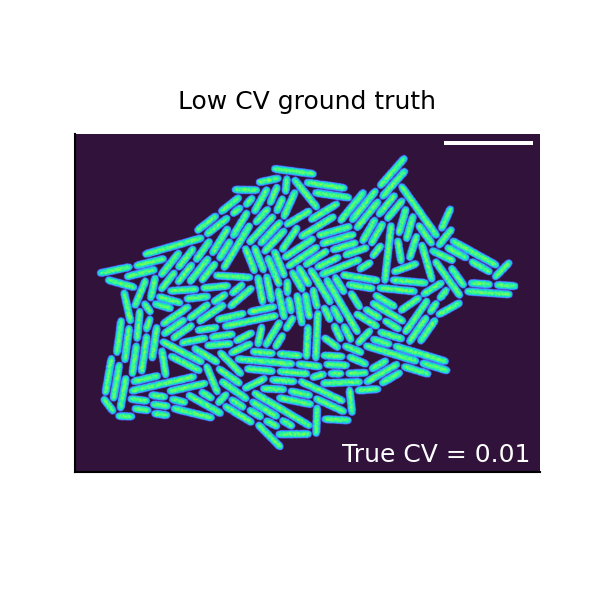

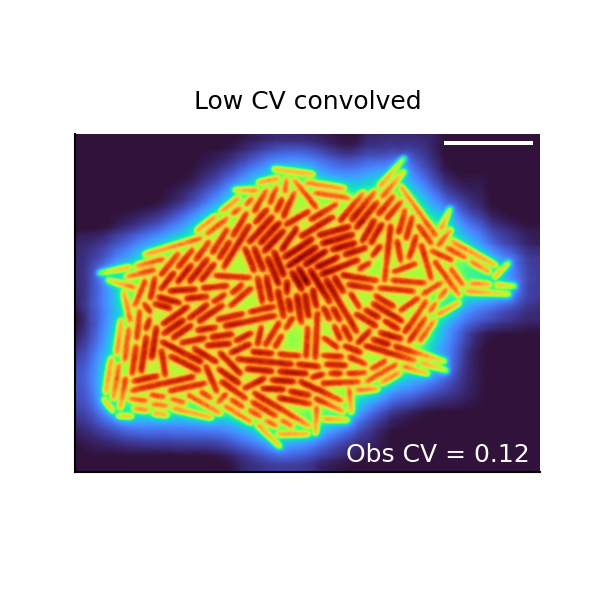

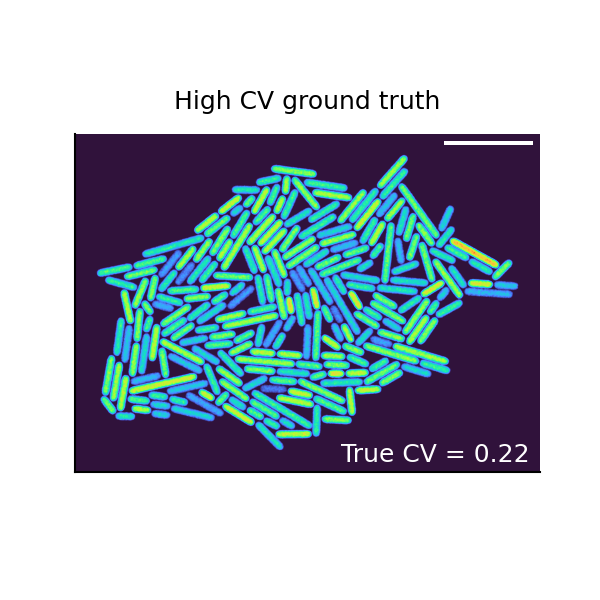

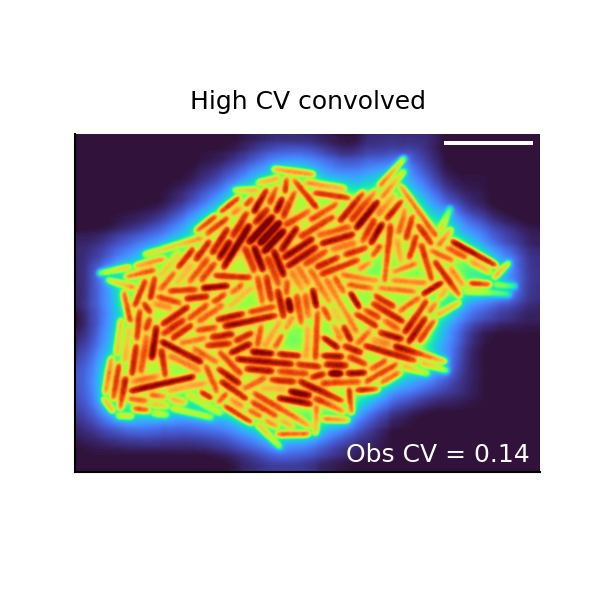

/tmp/ipykernel_158771/4141204075.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.scatterplot(


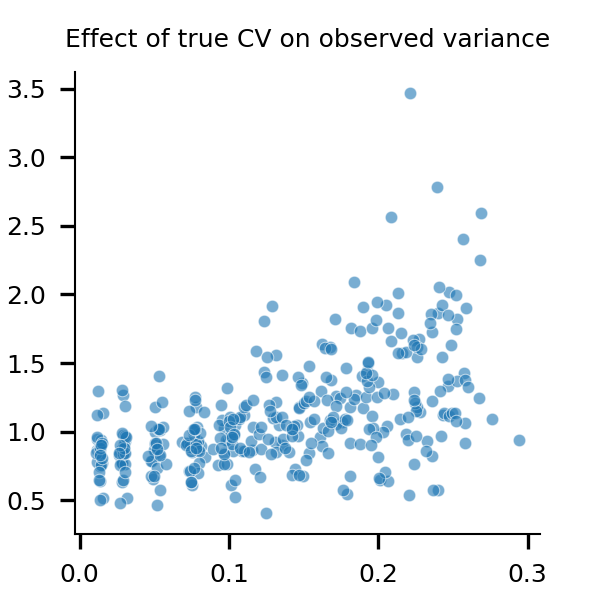

/tmp/ipykernel_158771/4141204075.py:98: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.scatterplot(


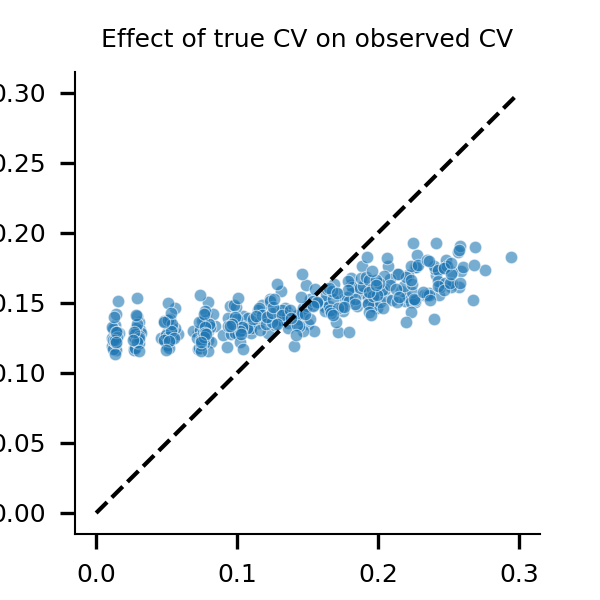

In [2]:
colony_ID_low_CV = 315
colony_ID_high_CV = colony_ID_low_CV + 2844

low_CV_unconv = tifffile.imread(f"../../microcolony_analysis/data/fluorescent_scenes_3D//{str(colony_ID_low_CV+1).zfill(5)}.tif").sum(axis=0)
high_CV_unconv = tifffile.imread(f"../../microcolony_analysis/data/fluorescent_scenes_3D//{str(colony_ID_high_CV+1).zfill(5)}.tif").sum(axis=0)
low_CV_conv = tifffile.imread(f"../../microcolony_analysis/simulated_colonies_empirical_PSF/training_data_100x_0.55_green_1.49_1.518//synth_imgs/{str(colony_ID_low_CV).zfill(4)}.tif")
high_CV_conv = tifffile.imread(f"../../microcolony_analysis/simulated_colonies_empirical_PSF/training_data_100x_0.55_green_1.49_1.518/synth_imgs/{str(colony_ID_high_CV).zfill(4)}.tif")


colony_plot_data = pd.read_pickle("../../microcolony_analysis/microcolony_plotting_data.pickle")

mask = np.array(Image.open(f"../../microcolony_analysis/data/masks//{str(colony_ID_low_CV+1).zfill(5)}.png"))

CV_low_CV_conv = get_CV_from_img_mask(low_CV_conv, mask)[0]

#mask = np.array(Image.open(f"../../microcolony_analysis/data/masks//{str(colony_ID_low_CV+1).zfill(5)}.png"))

CV_low_CV_unconv = get_CV_from_img_mask(low_CV_unconv, mask)[0]

mask = np.array(Image.open(f"../../microcolony_analysis/data/masks//{str(colony_ID_high_CV+1).zfill(5)}.png"))

CV_high_CV_conv =  get_CV_from_img_mask(high_CV_conv, mask)[0]

mask = np.array(Image.open(f"../../microcolony_analysis/data/masks//{str(colony_ID_high_CV+1).zfill(5)}.png"))

CV_high_CV_unconv = get_CV_from_img_mask(high_CV_unconv, mask)[0]




cmap="turbo"


cm = 1/2.54
a = matplotlib.cm.get_cmap('Set2')

fig, LOW_CV_UNCONV  = plt.subplots(1,1, figsize=(2,2), dpi = 300)
plt.imshow(gaussian_filter(low_CV_unconv,1), cmap=cmap, vmin=0, vmax = high_CV_unconv.max()*0.9  )
LOW_CV_UNCONV.annotate( f'True CV = {CV_low_CV_unconv:.2f}', (1030,700), ha='right', va='top', transform=LOW_CV_UNCONV.transAxes, c="white")
scalebar = ScaleBar(0.05, "um", label_loc=None, scale_loc = "none", box_alpha=0, color="white", length_fraction=0.25) # 10 micron
LOW_CV_UNCONV.add_artist(scalebar)
LOW_CV_UNCONV.set_xticks([])
LOW_CV_UNCONV.set_yticks([])
plt.title("Low CV ground truth")
plt.savefig("a.svg")
plt.show()
plt.close() 

fig, LOW_CV_CONV  = plt.subplots(1,1, figsize=(2,2), dpi = 300)
plt.imshow(low_CV_conv, cmap=cmap, vmin=0,vmax = high_CV_conv.max()*0.9 ) 
LOW_CV_CONV.annotate( f'Obs CV = {CV_low_CV_conv:.2f}', (1030,700), ha='right', va='top', transform=LOW_CV_CONV.transAxes, c="white")
scalebar = ScaleBar(0.05, "um", label_loc=None, scale_loc = "none", box_alpha=0, color="white", length_fraction=0.25) # 10 micron
LOW_CV_CONV.add_artist(scalebar)
LOW_CV_CONV.set_xticks([])
LOW_CV_CONV.set_yticks([])
plt.title("Low CV convolved")
plt.savefig("b.svg")
plt.show()
plt.close()

fig, HIGH_CV_UNCONV  = plt.subplots(1,1, figsize=(2,2), dpi = 300)
plt.imshow(gaussian_filter(high_CV_unconv,1), cmap=cmap, vmin=0, vmax = high_CV_unconv.max()*0.9)
HIGH_CV_UNCONV.annotate( f'True CV = {CV_high_CV_unconv:.2f}', (1030,700), ha='right', va='top', transform=HIGH_CV_UNCONV.transAxes, c="white")
scalebar = ScaleBar(0.05, "um", label_loc=None, scale_loc = "none", box_alpha=0, color="white", length_fraction=0.25) # 10 micron
HIGH_CV_UNCONV.add_artist(scalebar)
HIGH_CV_UNCONV.set_xticks([])
HIGH_CV_UNCONV.set_yticks([])
plt.title("High CV ground truth")
plt.savefig("c.svg")
plt.show()
plt.close()

fig, HIGH_CV_CONV  = plt.subplots(1,1, figsize=(2,2), dpi = 300)
plt.imshow(high_CV_conv, cmap=cmap, vmin=0,vmax = high_CV_conv.max()*0.9 )
HIGH_CV_CONV.annotate( f'Obs CV = {CV_high_CV_conv:.2f}', (1030,700), ha='right', va='top', transform=HIGH_CV_CONV.transAxes, c="white")
scalebar = ScaleBar(0.05, "um", label_loc=None, scale_loc = "none", box_alpha=0, color="white", length_fraction=0.25) # 10 micron
HIGH_CV_CONV.add_artist(scalebar)
HIGH_CV_CONV.set_xticks([])
HIGH_CV_CONV.set_yticks([])
plt.title("High CV convolved")
plt.savefig("d.svg")
plt.show()
plt.close()

fig, VAR = plt.subplots(1,1, figsize=(2,2), dpi = 300)
g = sns.scatterplot(
    data=colony_plot_data.drop_duplicates(["Colony ID", "NA","Wavelength"]).query("`Wavelength` == 0.55 & NA != 0.95 & `Colony N cells` > 150 & `NA` == 'Empirical 1.49'"), 
    x="True CV", 
    y = "Observed var", 
    alpha=0.6, palette="icefire", legend = None
)
plt.title("Effect of true CV on observed variance")
plt.savefig("e.svg")
plt.show()
plt.close()

fig, CVPLOT = plt.subplots(1,1, figsize=(2,2), dpi = 300)
g = sns.scatterplot(
    data=colony_plot_data.drop_duplicates(["Colony ID", "NA","Wavelength"]).query("`Wavelength` == 0.55 & NA != 0.95 & `Colony N cells` > 150 & `NA` == 'Empirical 1.49'"), 
    x="True CV", 
    y = "Observed CV", 
    alpha=0.6, palette="icefire", legend = None
)
g.axes.plot([0,0.3],[0,0.3], c="k", linestyle="--")
plt.title("Effect of true CV on observed CV")
plt.savefig("f.svg")
plt.show()
plt.close()


/tmp/ipykernel_158771/3533112417.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  VAR = plt.subplot2grid((20, 30), (1, 23), colspan=10, rowspan=7)
/tmp/ipykernel_158771/3533112417.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.scatterplot(
/tmp/ipykernel_158771/3533112417.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.scatterplot(


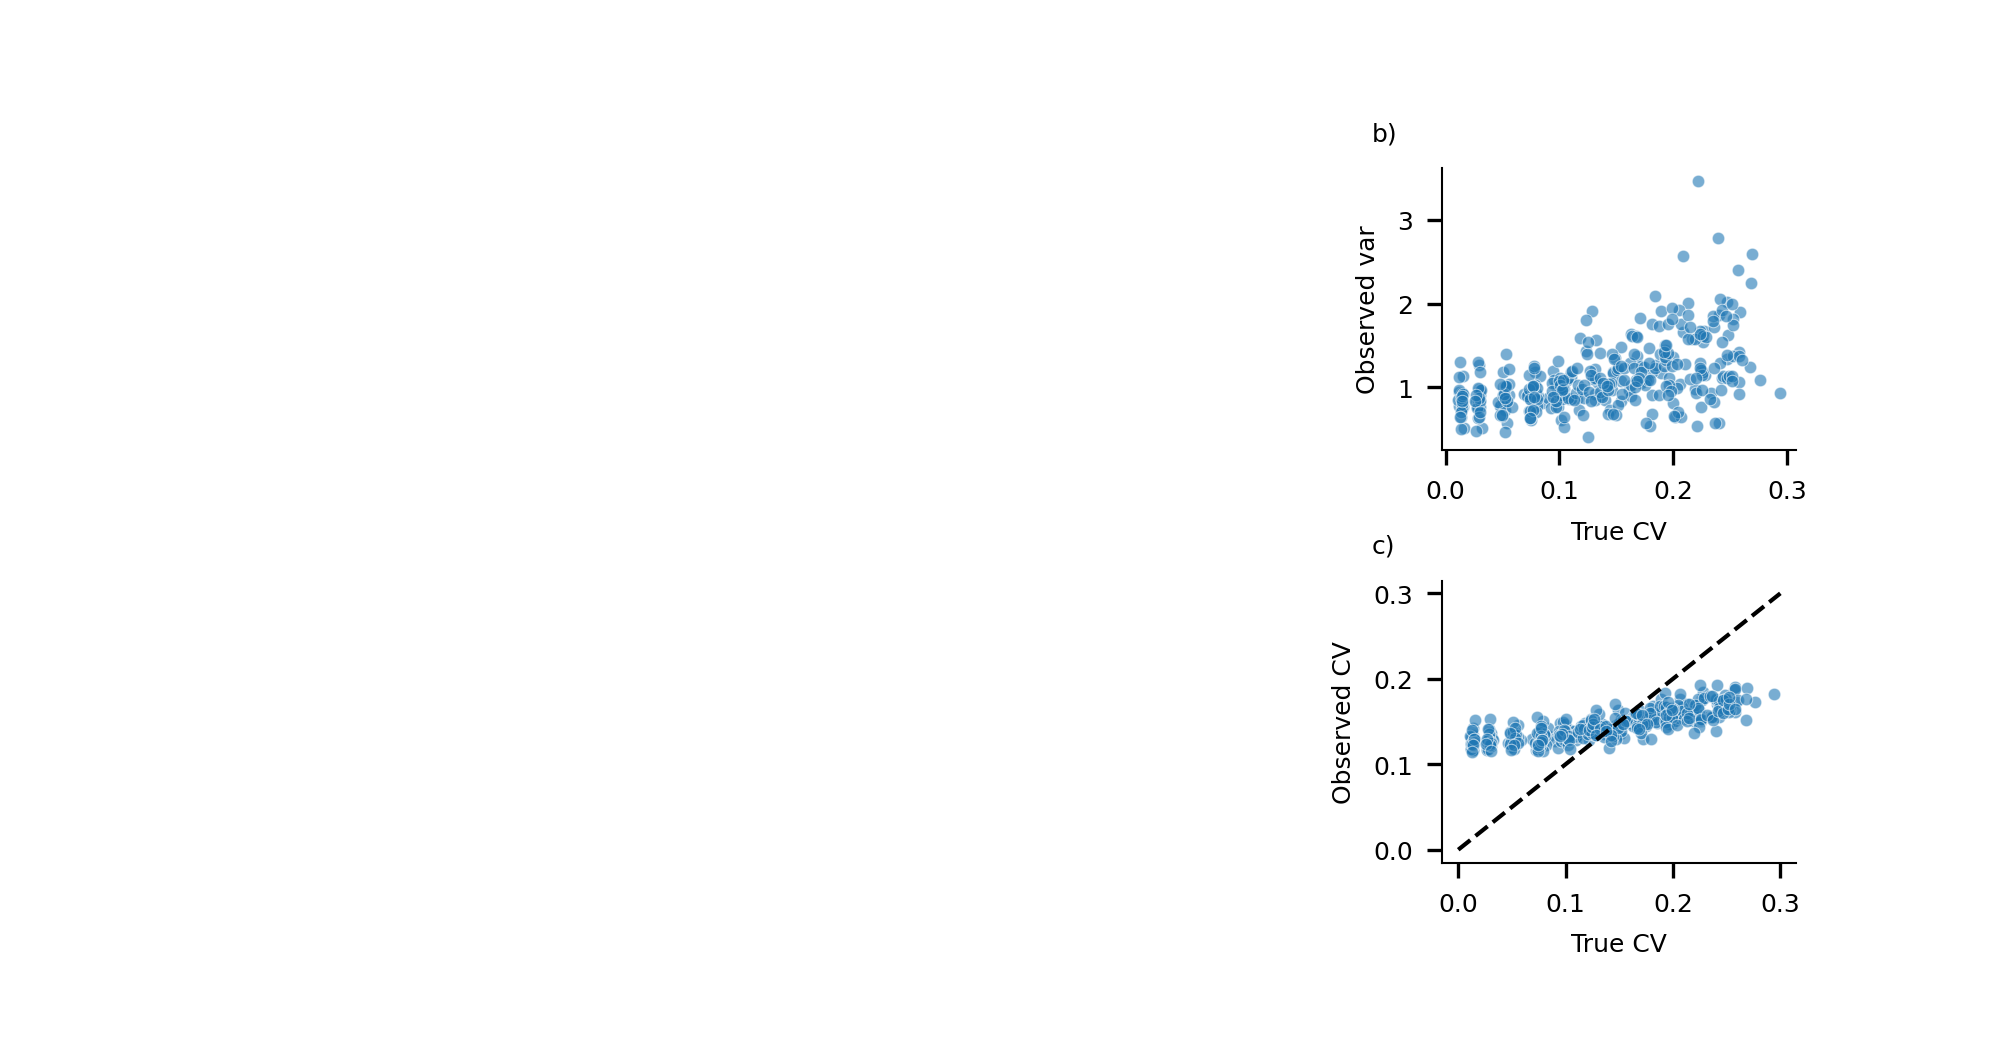

In [3]:

fig, axs = plt.subplots(figsize = (16.9*cm,9*cm), dpi = 300)









VAR = plt.subplot2grid((20, 30), (1, 23), colspan=10, rowspan=7)
plt.text(-.2, 1.165, 'b)', ha='left', va='top', transform=VAR.transAxes)

g = sns.scatterplot(
    data=colony_plot_data.drop_duplicates(["Colony ID", "NA","Wavelength"]).query("`Wavelength` == 0.55 & NA != 0.95 & `Colony N cells` > 150 & `NA` == 'Empirical 1.49'"), 
    x="True CV", 
    y = "Observed var", 
    alpha=0.6, palette="icefire", legend = None
)

CVPLOT = plt.subplot2grid((20, 30), (11, 23), colspan=10, rowspan=7)
plt.text(-.2, 1.165, 'c)', ha='left', va='top', transform=CVPLOT.transAxes)

g = sns.scatterplot(
    data=colony_plot_data.drop_duplicates(["Colony ID", "NA","Wavelength"]).query("`Wavelength` == 0.55 & NA != 0.95 & `Colony N cells` > 150 & `NA` == 'Empirical 1.49'"), 
    x="True CV", 
    y = "Observed CV", 
    alpha=0.6, palette="icefire", legend = None
)
g.axes.plot([0,0.3],[0,0.3], c="k", linestyle="--")